<a href="https://colab.research.google.com/github/sid0312/NLP/blob/master/Shakespeare's_poems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)
  
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-04-04 10:46:10--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 2a00:1450:4013:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-04-04 10:46:10 (163 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [3]:
from tensorflow.keras import regularizers
model = Sequential()
model.add(Embedding(total_words,100,input_length=max_sequence_len-1))
model.add((LSTM(150,return_sequences=True)))
model.add(Dropout(0.2))
model.add((LSTM(64)))
model.add(Dense(64,activation ='relu'))
model.add(Dense(total_words,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

ERROR! Session/line number was not unique in database. History logging moved to new session 59
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
lstm (LSTM)                  (None, 10, 150)           150600    
_________________________________________________________________
dropout (Dropout)            (None, 10, 150)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                55040     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              208715    
Total params: 739,615
Train

In [4]:
history = model.fit(predictors,label,epochs=300)

Epoch 1/300
484/484 [==============================] - 4s 8ms/step - loss: 6.9233 - accuracy: 0.0211
Epoch 2/300
484/484 [==============================] - 4s 8ms/step - loss: 6.5421 - accuracy: 0.0235
Epoch 3/300
484/484 [==============================] - 4s 8ms/step - loss: 6.4328 - accuracy: 0.0251
Epoch 4/300
484/484 [==============================] - 4s 8ms/step - loss: 6.3150 - accuracy: 0.0309
Epoch 5/300
484/484 [==============================] - 4s 8ms/step - loss: 6.1927 - accuracy: 0.0368
Epoch 6/300
484/484 [==============================] - 4s 8ms/step - loss: 6.0862 - accuracy: 0.0402
Epoch 7/300
484/484 [==============================] - 4s 8ms/step - loss: 5.9798 - accuracy: 0.0451
Epoch 8/300
484/484 [==============================] - 4s 8ms/step - loss: 5.8652 - accuracy: 0.0492
Epoch 9/300
484/484 [==============================] - 4s 8ms/step - loss: 5.7423 - accuracy: 0.0552
Epoch 10/300
484/484 [==============================] - 4s 8ms/step - loss: 5.6311 - accura

In [0]:
model.save('poetry1.h5')

In [0]:
import matplotlib.pyplot as plt

def plotter(history,string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

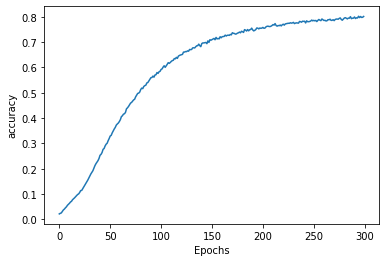

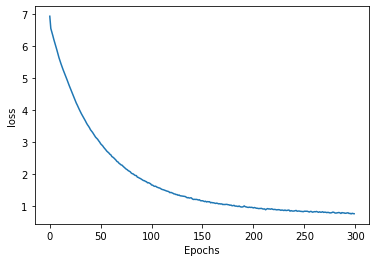

In [8]:
plotter(history,'accuracy')
plotter(history,'loss')

In [0]:
def sing(seed,next_words=60):
  for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list],maxlen=max_sequence_len-1)
    predictions = model.predict_classes(token_list,verbose=0)
    output_word =""
    for word, index in tokenizer.word_index.items():
      if index == predictions:
        output_word = word
        break
    seed +=" "+output_word
  return seed

In [27]:
sing('Wherefore art thou Romeo',50)

"Wherefore art thou Romeo change is love with me respect true well see thee but move grow it room kind room well cross'd ill ' gems prove ' thee you best see thee thee live well more see others so now writ away well level open truth would wink ' well do hell nor"

In [28]:
sing('Superfluity comes from grey hairs but competency lives longer')

"Superfluity comes from grey hairs but competency lives longer let your power from 'will ' hid in manners decay tell thee thy glory true rare ' ' found me acquainted rare ' hid thee refigured more part it well but state the treasure decay rare dear might kill'd rolling self ' it in it ' it ' ' it well others are ' due in thee more prove be"